# Exploring Activation Functions in Neural Networks

**Scenario:**
You are tasked with implementing and visualizing various activation functions to
observe how they transform inputs and affect the output. You will also train a simple
neural network using these activation functions and evaluate their performance.

**1. Implement and Visualize Activation Functions:**

*Implement the following activation functions in Python:*

▪ Step Function
▪ Sigmoid Function (Binary and Bipolar)
▪ Tanh Function
▪ ReLU Function

Visualize each activation function using matplotlib/seaborn/bokeh to
observe how they map input values to output values.

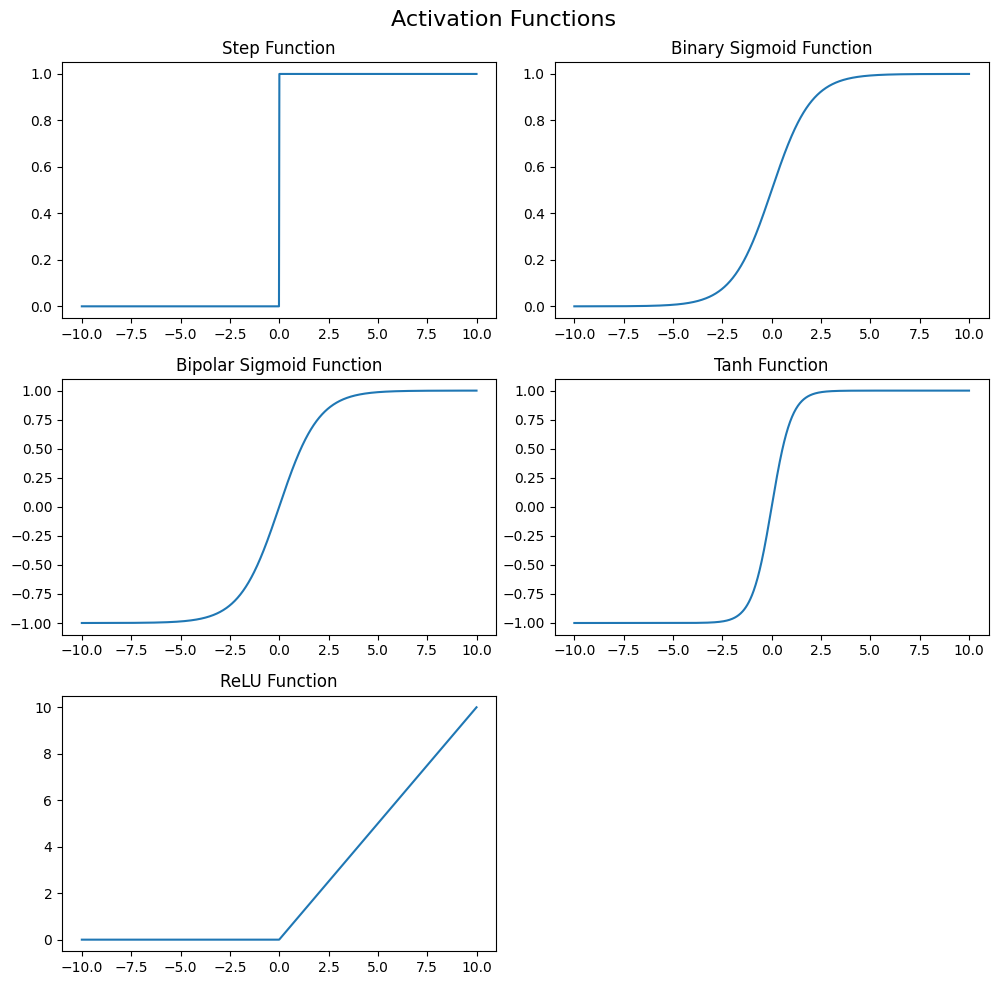

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
    return 2 / (1 + np.exp(-x)) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)

# Generate input values
x = np.linspace(-10, 10, 1000)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Activation Functions', fontsize=16)

# Step Function
axs[0, 0].plot(x, step_function(x))
axs[0, 0].set_title('Step Function')

# Binary Sigmoid Function
axs[0, 1].plot(x, sigmoid_binary(x))
axs[0, 1].set_title('Binary Sigmoid Function')

# Bipolar Sigmoid Function
axs[1, 0].plot(x, sigmoid_bipolar(x))
axs[1, 0].set_title('Bipolar Sigmoid Function')

# Tanh Function
axs[1, 1].plot(x, tanh_function(x))
axs[1, 1].set_title('Tanh Function')

# ReLU Function
axs[2, 0].plot(x, relu_function(x))
axs[2, 0].set_title('ReLU Function')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()

**2. Implement a Simple Neural Network:**

• Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).

• Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.

• Compare the performance of the neural network with different activation
functions.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with sigmoid activation function...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Training with tanh activation function...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with relu activation function...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy with sigmoid activation: 0.8767
Accuracy with tanh activation: 0.9767
Accuracy with relu activation: 0.9800


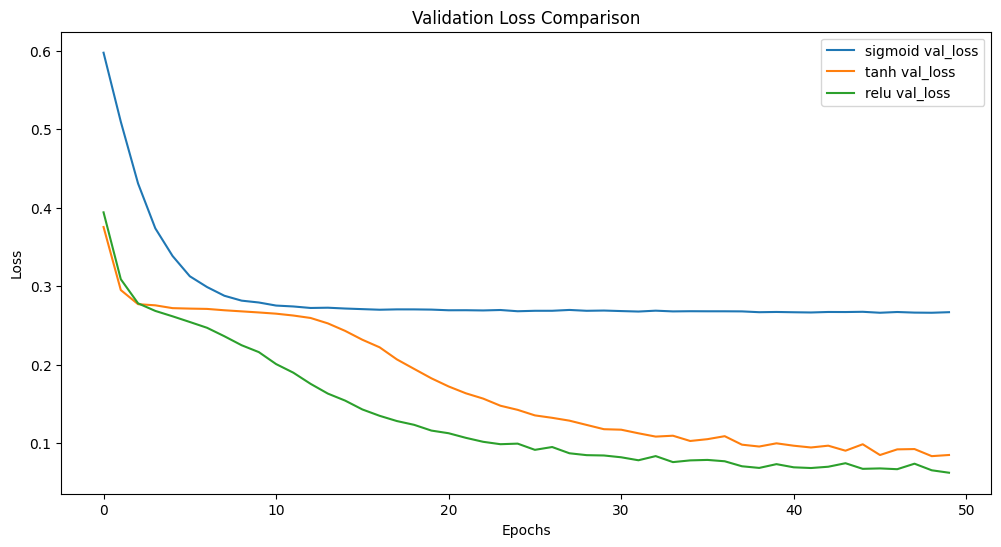

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Create a small dataset for binary classification
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Define a function to create a model with a specific activation function
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Train models with different activation functions
activations = ['sigmoid', 'tanh', 'relu']
histories = {}
accuracies = {}

for activation in activations:
    model = create_model(activation)
    print(f"\nTraining with {activation} activation function...")
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)

    # Store history and accuracy
    histories[activation] = history
    accuracies[activation] = accuracy

# 4. Compare Performance
for activation in activations:
    print(f"Accuracy with {activation} activation: {accuracies[activation]:.4f}")

# 5. Plot the loss curves for comparison
plt.figure(figsize=(12, 6))
for activation in activations:
    plt.plot(histories[activation].history['val_loss'], label=f'{activation} val_loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
